In [28]:
import pandas as pd
import numpy as np
from sklearn import tree, utils, model_selection, metrics

In [38]:
df = pd.read_csv('balance-scale.data')

In [39]:
df.columns = ['class_name', 'left_weight', 'left_dist', 'right_weight', 'right_dist']
df.head()

,class_name,left_weight,left_dist,right_weight,right_dist
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [40]:
df['class_name'].value_counts()

R    288
L    288
B     48
Name: class_name, dtype: int64

In [41]:
y = df['class_name']
X = df.drop('class_name', axis=1)

In [42]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

In [43]:
model_dr = tree.DecisionTreeClassifier(random_state=0)
model_dr.fit(X_train, y_train)
model_dr.score(X_test, y_test)

0.7467948717948718

In [44]:
y_pred = model_dr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred, labels=['B', 'L', 'R'])
cm

array([[  3,   9,  11],
       [ 25, 122,   9],
       [ 19,   6, 108]])

In [62]:
import itertools

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[  3   9  11]
 [ 25 122   9]
 [ 19   6 108]]


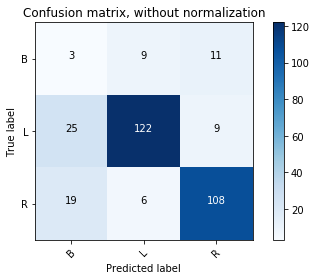

In [63]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred,labels=['B', 'L', 'R'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['B', 'L', 'R'],
                      title='Confusion matrix, without normalization')

In [47]:
false_positive = cm.sum(axis=0) - np.diag(cm)
false_positive

array([44, 15, 20])

In [49]:
false_negative = cm.sum(axis=1) - np.diag(cm)
false_negative

array([20, 34, 25])

In [65]:
true_positive = np.diag(cm)
true_positive

array([  3, 122, 108])

In [67]:
true_negative = cm.sum()-(false_positive+false_negative+true_positive)
true_negative

array([245, 141, 159])

In [69]:
recall = true_positive / (true_positive + false_negative) 
recall

array([0.13, 0.78, 0.81])

In [71]:
precision = true_positive / (true_positive + false_positive)
precision

array([0.06, 0.89, 0.84])

In [73]:
specificity = true_negative / (true_negative + false_positive)
specificity

array([0.85, 0.9 , 0.89])